In [149]:
import numpy as np
import pandas as pd
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import matplotlib.pyplot as plt
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [150]:
#Read the data:
catches_df = pd.read_csv("catches_24_7_2021.csv")

In [151]:
print("There are {} rows originally in the data".format(len(catches_df)))
catches_df.head()

There are 6272 rows originally in the data


,Community Group,Number/Code,Trap type,Bait,Strikes,Species caught,Date,Notes,created date,last edited date,Status,Rebaited,Trap condition
0,Predator Free Port Hills Huntsbury,TP0004,DOC 200,Peanut butter,1.0,Rat,"January 8, 2018",NaN,"October 29, 2020","November 25, 2020",Sprung,Yes,OK
1,Predator Free Port Hills Huntsbury,TP0004,DOC 200,Peanut butter,1.0,Rat,"January 14, 2019",NaN,"October 29, 2020","November 25, 2020",Sprung,Yes,NaN
2,Predator Free Port Hills Huntsbury,TP0004,DOC 200,None,1.0,Rat,"December 6, 2017",NaN,"October 29, 2020","November 25, 2020",Sprung,Yes,OK
3,Predator Free Port Hills Huntsbury,TP0004,DOC 200,None,1.0,Rat,"July 6, 2017",NaN,"October 29, 2020","November 25, 2020",Sprung,Yes,OK
4,Predator Free Port Hills Huntsbury,TP0004,DOC 200,Peanut butter,1.0,Rat,"October 14, 2017",NaN,"October 29, 2020","November 25, 2020",Sprung,Yes,OK


In [152]:
catches_df['Community Group'] = catches_df['Community Group'].str.replace("Predator Free Port Hills ","")

In [153]:
def remove_nans(df,col):
    before = len(df)
    df = df.dropna(subset=[col])
    after = len(df)
    print("{} rows with Nan {} values removed".format(before-after,col))
    return df

In [155]:
#Replace "Mt Pleasant" with "Mount Pleasant"
catches_df.replace("Mt Pleasant", "Mount Pleasant", inplace=True)

In [156]:
catches_df = remove_nans(catches_df,'Community Group')
catches_df['Community Group'].unique()

3 rows with Nan Community Group values removed


array(['Huntsbury', 'St Martins', 'Cashmere', 'Hillsborough',
       'Westmorland', 'Lyttelton', 'Sumner Bays', 'Mount Pleasant',
       'Diamond Harbour', 'Heathcote', 'Head of the Harbour', 'Halswell',
       'Tai Tapu'], dtype=object)

In [157]:
catches_df = remove_nans(catches_df,'Bait')
catches_df['Bait'].unique()

24 rows with Nan Bait values removed


array(['Peanut butter', 'None', 'Dried fruit', 'Other (please specify)',
       'Fresh fruit', 'Fresh meat', 'Salted meat', 'Cheese',
       'Rat and Possum Lure', 'Chocolate', 'Mustelid and Cat Lure',
       'Lure', 'Tinned Sardines', 'cheese', 'Eggsellent from Connovation',
       'Whole egg', 'cereal', 'Tahini', 'nutella', 'chocolate', 'Jam',
       'fat', 'other', 'Fat', 'Goodnature Rat and Mouse Lure',
       'Mayonnaise', 'Nutella', 'Fresh Rabbit', 'Cereal', 'Carrot',
       'Possum Dough', '\u200bGoodnature Stoat Lure', 'Dehydrated Rabbit',
       'Nut'], dtype=object)

In [158]:
catches_df = remove_nans(catches_df,'Species caught')
catches_df['Species caught'].unique()

0 rows with Nan Species caught values removed


array(['Rat', 'Hedgehog', 'Weasel', 'Mouse', 'Possum', 'None',
       'Unspecified', 'Other', 'Cat', 'Magpie', 'Bird', 'Stoat', 'Rabbit',
       'Ferret'], dtype=object)

In [159]:
catches_df = remove_nans(catches_df,'Trap type')
catches_df['Trap type'].unique()

13 rows with Nan Trap type values removed


array(['DOC 200', 'Unspecified', 'Cage Trap', 'Rat trap', 'Mouse trap',
       'Timms', 'A24', 'Trapinator', 'A12', 'DOC 150', 'Victor',
       'Snap E Rat', 'other', 'fenn', 'DOC 250', 'Leg hold trap',
       'Sentinel', 'Zaptrap', 'D-Rat', 'Ka mate', 'T-Rex Rat Trap'],
      dtype=object)

In [160]:
catches_df = remove_nans(catches_df,'Number/Code')
print("There are {} unique trap IDs".format(len(catches_df['Number/Code'].unique())))

117 rows with Nan Number/Code values removed
There are 1008 unique trap IDs


In [161]:
print("There are {} rows remaining in the data".format(len(catches_df)))

There are 6115 rows remaining in the data


In [162]:
def plot_bar_by_category(df,category, color="#DD9933", title="", filename=None):
    """
     Produce a bar graphy showing percentages of catches broken down by category
     
    """

    cat_counts = df[category].value_counts()
    fig = plt.figure(2,figsize=(12,8))
    ax = fig.subplots(1)
    hb = ax.barh(cat_counts.keys(),cat_counts.to_numpy(),color=color)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate("{:.1f}%".format(width/len(df)*100), (x + width+10,y + height/2-0.15), ha='left')
    plt.xlabel("Catches")
    plt.ylabel(category)
    plt.title(title)
    if filename is not None:
        plt.tight_layout()
        plt.savefig(filename)
    plt.show()
    








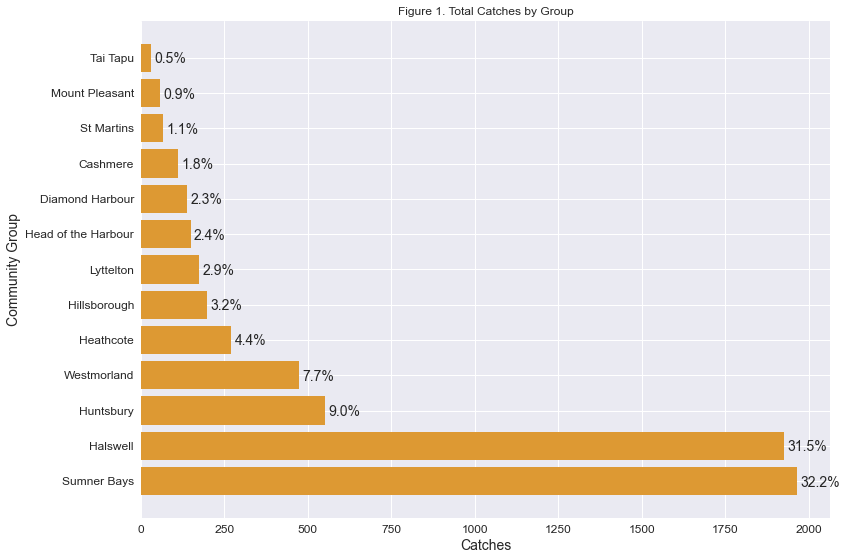

In [163]:
plot_bar_by_category(catches_df, "Community Group", color="#DD9933", title="Figure 1. Total Catches by Group",
                    filename="plots/fig1_catches_by_group_bar")

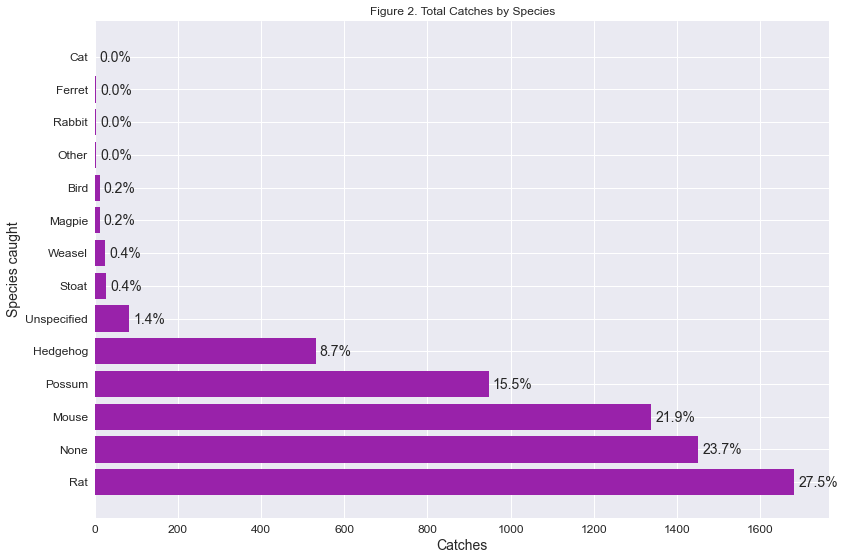

In [164]:
plot_bar_by_category(catches_df, "Species caught", color="#9922AA", title="Figure 2. Total Catches by Species",
                    filename="plots/fig2_catches_by_species_bar")

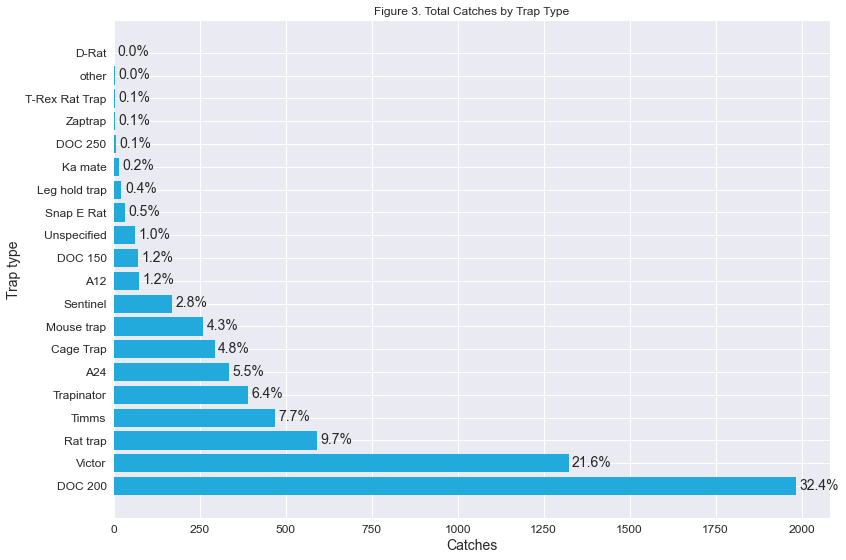

In [165]:
plot_bar_by_category(catches_df, "Trap type", color="#22AADD", title="Figure 3. Total Catches by Trap Type",
                    filename="plots/fig3_catches_by_type_bar")

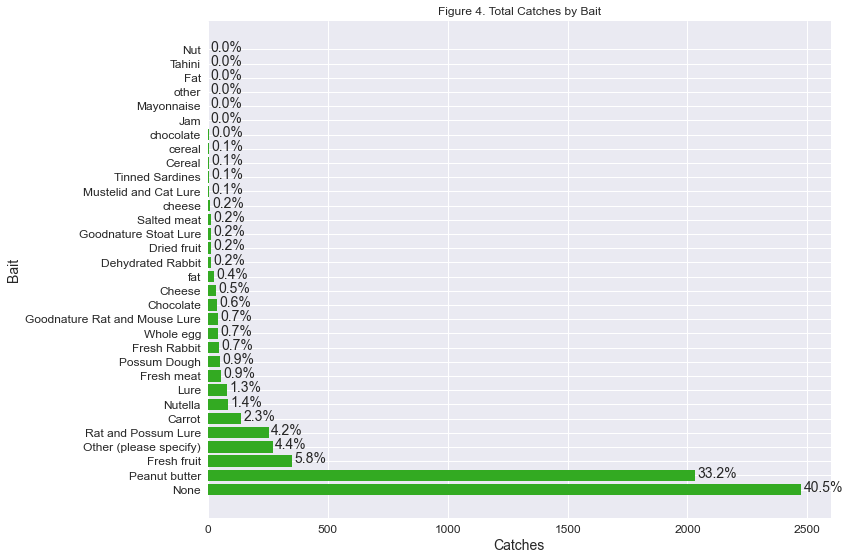

In [166]:
plot_bar_by_category(catches_df, "Bait", color="#33AA22", title="Figure 4. Total Catches by Bait",
                    filename="plots/fig4_catches_by_bait_bar")

In [167]:
# Add datetime column:
catches_df['Datetime'] = pd.to_datetime(catches_df['Date'])


In [168]:
# Write to HDF5
catches_df.to_hdf('catches.h5',key='catches',mode='w')

/Users/que/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:2700: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['Community Group', 'Number/Code', 'Trap type', 'Bait', 'Species caught',
       'Date', 'Notes', 'created date', 'last edited date', 'Status',
       'Rebaited', 'Trap condition'],
      dtype='object')]

  pytables.to_hdf(
